In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# load data

In [2]:
# Number of instances: 2535
# Number of attributes: 73 attributes  

df_data1 = pd.read_csv('ozone_eighthr.csv')
df_data1.replace(['?'],[-999], inplace =True)
df_data1.fillna(-999, inplace =True)
df_data1.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [3]:
df_data2 = pd.read_csv("ozone_onehr.csv")
df_data2.replace(['?'],[-999], inplace =True)
df_data2.fillna(-999, inplace =True)
df_data2.iloc[:3]

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Orzone
0,01/01/1998,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0.0,0
1,01/02/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0.0,0
2,01/03/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0.0,0


In [4]:
df_data1.groupby('Orzone')['Orzone'].count()

Orzone
0    2374
1     160
Name: Orzone, dtype: int64

In [5]:
df_data2.groupby('Orzone')['Orzone'].count()

Orzone
0    2463
1      73
Name: Orzone, dtype: int64

# Compare dataset split

test_size is 0.2 , auc is 0.8881856540084387
test_size is 0.4 , auc is 0.8940352896049099
test_size is 0.6 , auc is 0.9089706123544411
test_size is 0.8 , auc is 0.8804856709984422


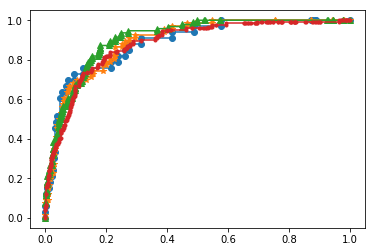

In [6]:
fpr = []
tpr = []
for size in [0.2, 0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = train_test_split(
                                df_data1.iloc[:, 1:-1].values, 
                                df_data1.iloc[:, -1].values, 
                                test_size=size, 
                                random_state=42)
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('test_size is %s' % size, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.show()

With the increase of test_size, the data of the training set becomes less and less, and the predictive power of the trained model first increases and then decreases.

# Compare hyperparameters

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
                                df_data1.iloc[:, 1:-1].values, 
                                df_data1.iloc[:, -1].values, 
                                test_size=0.33, 
                                random_state=42)

(a) compare max_depth in GradientBoostingClassifier

max_depth is 3 , auc is 0.8944853875476494
max_depth is 4 , auc is 0.8944599745870394
max_depth is 5 , auc is 0.9043202033036849
max_depth is 6 , auc is 0.8938754764930115
max_depth is 7 , auc is 0.8831003811944091
max_depth is 8 , auc is 0.858843710292249


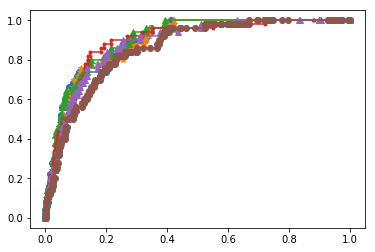

In [8]:
fpr = []
tpr = []

for item in [3,4,5,6,7,8]:
    model = GradientBoostingClassifier(max_depth = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('max_depth is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.plot(fpr[5], tpr[5], marker = 'o') 
plt.show()

As max_depth goes up, auc goes up and then down, when max_depth grow too large,the model is overfit.

(b) compare n_estimators in GradientBoostingClassifier

n_estimators is 70 , auc is 0.8885133418043202
n_estimators is 80 , auc is 0.894587039390089
n_estimators is 90 , auc is 0.8932655654383737
n_estimators is 100 , auc is 0.8943583227445997
n_estimators is 110 , auc is 0.8945362134688691


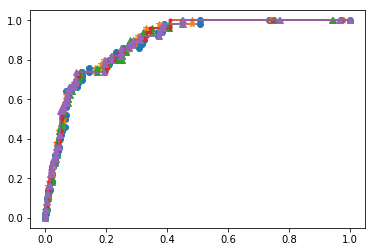

In [9]:
fpr = []
tpr = []

for item in [70, 80, 90, 100, 110]:
    model = GradientBoostingClassifier(n_estimators = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('n_estimators is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.show()

As n_estimators goes up, auc goes up, but auc grow slowly.The fitting ability of the model tends to be stable.

(C) compare max_features in RandomForestClassifier

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


n_estimators is 10 , auc is 0.8335451080050826
n_estimators is 20 , auc is 0.8167979669631512
n_estimators is 30 , auc is 0.8543456162642947
n_estimators is 40 , auc is 0.8083735705209658


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


n_estimators is 50 , auc is 0.8150063532401525


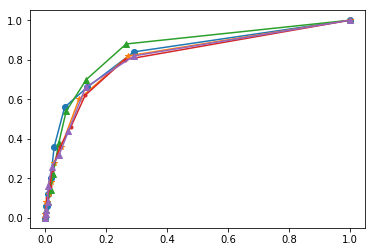

In [10]:
fpr = []
tpr = []
for item in [10, 20, 30, 40, 50]:
    model = RandomForestClassifier(max_features = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('n_estimators is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.show()

When n_estimators increase, the AUC increases first and then decreases, because when n_estimators increase, the model is first underfitted and then overfitted to achieve the best effect.

(d) compare max_depth in RandomForestClassifier

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


n_estimators is 30 , auc is 0.8386785260482846
n_estimators is 50 , auc is 0.7886404066073698
n_estimators is 70 , auc is 0.8255273189326556
n_estimators is 90 , auc is 0.8257306226175348
n_estimators is 110 , auc is 0.817433290978399


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


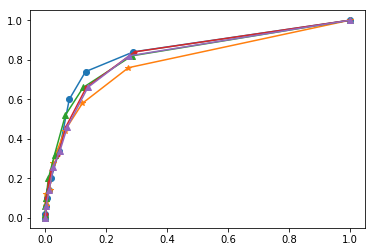

In [11]:
fpr = []
tpr = []
for item in [30, 50, 70, 90, 110]:
    model = RandomForestClassifier(max_depth = item)
    model.fit(X_train, y_train)
    y_new = model.predict_proba(X_test)[:, 1]   
    
    auc = metrics.roc_auc_score(y_test,y_new)
    print('n_estimators is %s' % item, ', auc is %s' % auc)
    
    fpr.append(metrics.roc_curve(y_test, y_new)[0])
    tpr.append(metrics.roc_curve(y_test, y_new)[1])

plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.plot(fpr[4], tpr[4], marker = '^') 
plt.show()

When max_depth increase, the AUC increases first and then decreases, because when max_depth increase, the model is first underfitted and then overfitted to achieve the best effect.

# Compare ensembles models

auc of GBDT is 0.8941804320203304
auc of RF is 0.7549809402795425


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


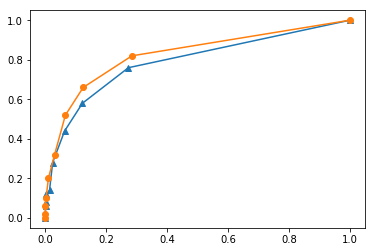

In [12]:
estimator1 = GradientBoostingClassifier()
estimator2 = RandomForestClassifier()

estimator1.fit(X_train, y_train)
estimator2.fit(X_train, y_train)

y_new1 = estimator1.predict_proba(X_test)[:, 1]
y_new2 = estimator2.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = metrics.roc_curve(y_test, y_new1)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_new1)

auc1 = metrics.roc_auc_score(y_test, y_new1)
print('auc of GBDT is %s' % auc1)
auc2 = metrics.roc_auc_score(y_test, y_new2)
print('auc of RF is %s' % auc2)

plt.plot(fpr[1], tpr[1], marker = '^') 
plt.plot(fpr[2], tpr[2], marker = 'o') 
plt.show()

GBDT is more concerned with deviations, RF is more about variance, so GBDT can get better AUC. By resampling rows and columns of samples, random forest trains multiple trees and fuses multiple trees to obtain the model. In this way, the random forest can get the model with smaller variance.GBDT, in the iteration process, each iteration focuses on the training of samples with large residual, and then obtains multiple tree models, and finally obtains the final result through the fusion of multiple models.